# ML_Model_for_Predicting_Ships_Crew_Size

In this notebook, I build a simple machine learning model to predict ships crew size using cruise_ship_info.csv dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read dataset

In [2]:
df = pd.read_csv("cruise_ship_info.csv")

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## Basic statistic of the data

In [4]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [5]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']

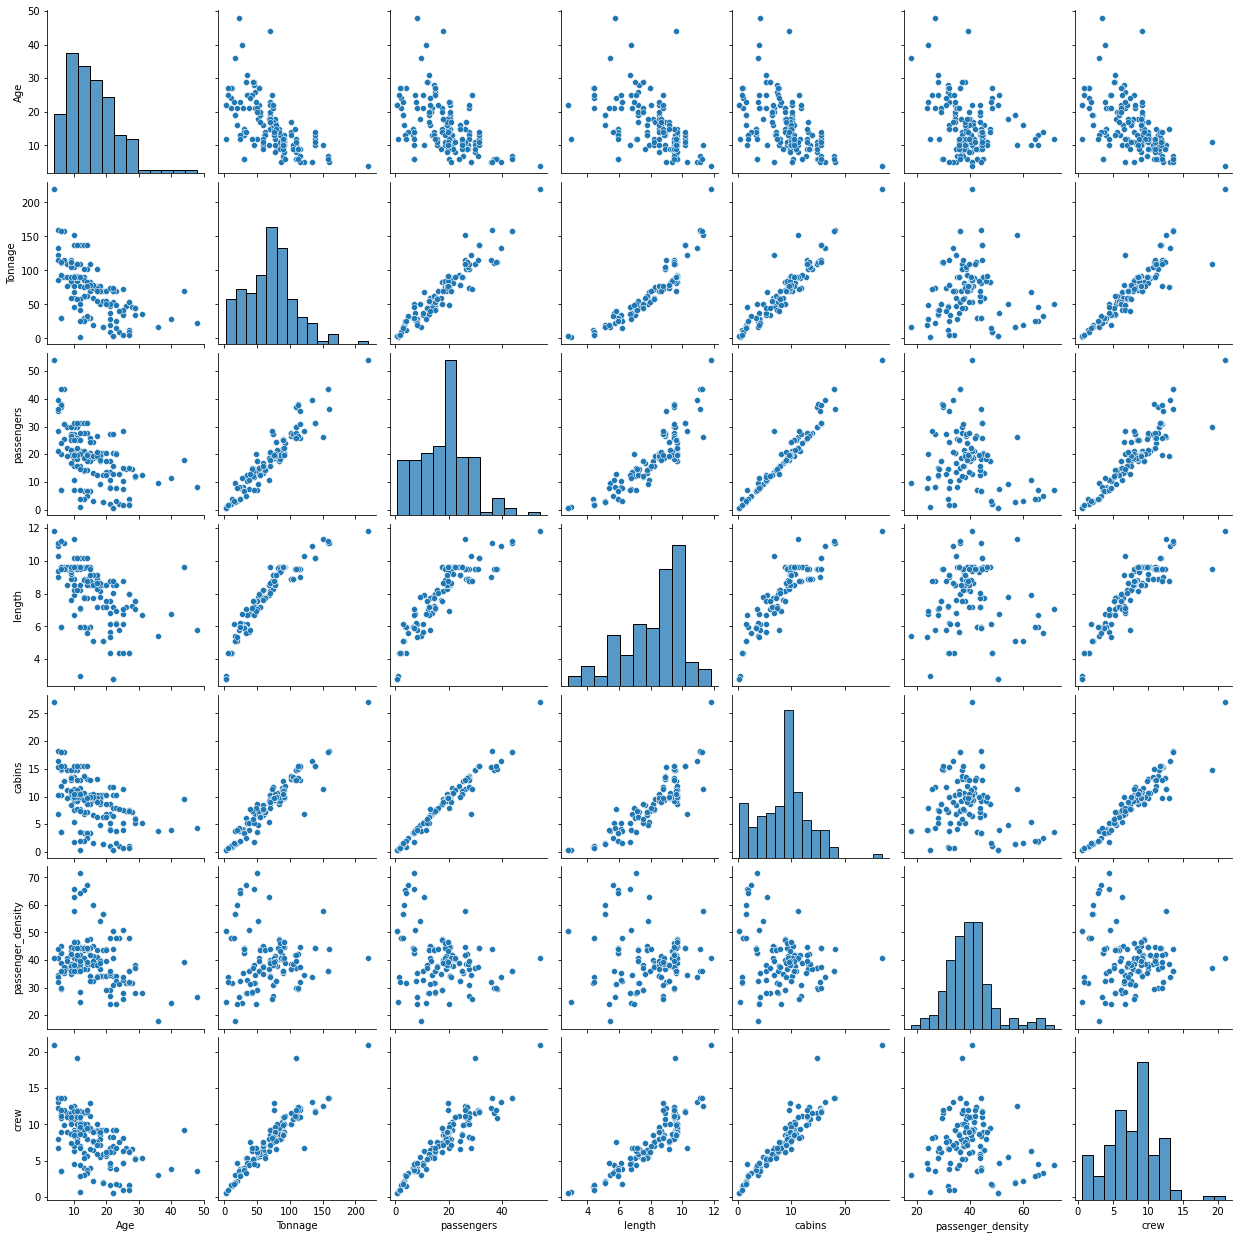

In [6]:
sns.pairplot(df[cols])

The target variable "crew" is highly correlated with 4 variables: 'Tonnage', 'passengers', 'length' and 'cabins'.

## Features selection

In [7]:
#Create a new dataframe to store the selected variables
col_selected = ['Tonnage', 'passengers', 'length' , 'cabins', 'crew']

In [8]:
df[col_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [9]:
X = df[col_selected].iloc[:,:4]
y = df[col_selected]['crew']

In [10]:
X.shape

(158, 4)

In [11]:
y.shape

(158,)

In [12]:
#Use 60% of the data for training and 40% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

## Building a regresion model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('slr', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)
y_train_pred_std = pipe.predict(X_train)
y_test_pred_std = pipe.predict(X_test)

In [14]:
# Evaluation of the Regression model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred_std),
    mean_squared_error(y_test, y_test_pred_std)))
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred_std),
    r2_score(y_test, y_test_pred_std)))

MSE train: 0.986, test: 0.849
R^2 train: 0.925, test: 0.921
